## 지하철 데이터 전처리

In [ ]:
import pandas as pd
#import glob

file_paths = [
    '/Users/guhee/Downloads/subway_1.xls',
    '/Users/guhee/Downloads/subway_2.xls',
    '/Users/guhee/Downloads/subway_3.xls',
    '/Users/guhee/Downloads/subway_4.xls'
]


dfs = [pd.read_excel(file,sheet_name='지하철 시간대별 이용현황') for file in file_paths]

df = pd.concat(dfs, ignore_index=True)

df

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2023-01,1호선,150.0,서울역,555,27,"6,560","7,430","11,059","41,800",...,"12,316","3,388","2,777",69,235,0,5,0,0,2023-02-03 10:11:21
2,2023-01,1호선,151.0,시청,95,0,"2,103","3,753","3,123","19,320",...,"3,160",353,703,1,22,0,0,0,0,2023-02-03 10:11:21
3,2023-01,1호선,152.0,종각,82,2,"3,427","4,474","4,126","21,088",...,"3,476","1,215",780,10,7,0,0,0,0,2023-02-03 10:11:21
4,2023-01,1호선,153.0,종로3가,113,9,"3,311","2,654","3,362","11,670",...,"3,433","1,323","1,571",25,45,0,5,0,0,2023-02-03 10:11:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,2023-11,신림선,4407.0,당곡,0,0,"1,914",226,"4,261","1,165",...,"3,892",201,"1,351",1,1,0,0,0,0,2023-12-03 09:30:45
2459,2023-11,신림선,4408.0,신림,1,0,"1,100",286,"1,330",632,...,"2,061",278,815,0,3,0,0,0,0,2023-12-03 09:30:45
2460,2023-11,신림선,4409.0,서원,3,0,"2,391",259,"4,234",674,...,"4,681",111,"1,567",1,1,0,0,0,0,2023-12-03 09:30:45
2461,2023-11,신림선,4410.0,서울대벤처타운,4,0,"6,116",546,"9,898","3,370",...,"11,495",527,"5,338",1,186,0,0,0,0,2023-12-03 09:30:45


In [ ]:
#Col_name .. 바꾸기
for col in df.columns:
    if '~' in col:
        time_range = col.split('~')[0].strip()
        hour = time_range.split(':')[0]
        new_col = f"{hour}시"
        df.rename(columns={col: new_col}, inplace=True)

new_columns = []
for col in df.columns:
    if 'Unnamed' in col:
        new_col = new_columns[-1]
    else:
        new_col = col
    new_columns.append(new_col)

df.columns = new_columns


df

,사용월,호선명,역ID,지하철역,04시,04시,05시,05시,06시,06시,...,23시,00시,00시,01시,01시,02시,02시,03시,03시,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2023-01,1호선,150.0,서울역,555,27,"6,560","7,430","11,059","41,800",...,"12,316","3,388","2,777",69,235,0,5,0,0,2023-02-03 10:11:21
2,2023-01,1호선,151.0,시청,95,0,"2,103","3,753","3,123","19,320",...,"3,160",353,703,1,22,0,0,0,0,2023-02-03 10:11:21
3,2023-01,1호선,152.0,종각,82,2,"3,427","4,474","4,126","21,088",...,"3,476","1,215",780,10,7,0,0,0,0,2023-02-03 10:11:21
4,2023-01,1호선,153.0,종로3가,113,9,"3,311","2,654","3,362","11,670",...,"3,433","1,323","1,571",25,45,0,5,0,0,2023-02-03 10:11:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,2023-11,신림선,4407.0,당곡,0,0,"1,914",226,"4,261","1,165",...,"3,892",201,"1,351",1,1,0,0,0,0,2023-12-03 09:30:45
2459,2023-11,신림선,4408.0,신림,1,0,"1,100",286,"1,330",632,...,"2,061",278,815,0,3,0,0,0,0,2023-12-03 09:30:45
2460,2023-11,신림선,4409.0,서원,3,0,"2,391",259,"4,234",674,...,"4,681",111,"1,567",1,1,0,0,0,0,2023-12-03 09:30:45
2461,2023-11,신림선,4410.0,서울대벤처타운,4,0,"6,116",546,"9,898","3,370",...,"11,495",527,"5,338",1,186,0,0,0,0,2023-12-03 09:30:45


In [ ]:
df = df.drop(['역ID','작업일시'],axis=1)

selected_columns = df.iloc[:, 3:52].loc[:, df.iloc[0, 3:52] == "승차"]


selected_columns[['사용월', '호선명', '지하철역']] = df[['사용월', '호선명', '지하철역']]


df_on = selected_columns

In [ ]:
order = ['사용월', '호선명', '지하철역', '04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
                 '21시', '22시', '23시', '00시', '01시', '02시', '03시']

df_on = df_on[order]
df_on = df_on.iloc[1:,:]

#승차
df_on.reset_index(drop=True,inplace=True)


df_on = df_on.dropna(subset=['사용월'])

df_on

,사용월,호선명,지하철역,04시,05시,06시,07시,08시,09시,10시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,2023-01,1호선,서울역,555,"6,560","11,059","36,434","63,029","52,580","54,340",...,"199,627","104,878","75,312","78,469","51,553","21,933","3,388",69,0,0
1,2023-01,1호선,시청,95,"2,103","3,123","6,859","8,173","9,615","12,041",...,"152,460","56,004","47,529","44,866","28,432","9,485",353,1,0,0
2,2023-01,1호선,종각,82,"3,427","4,126","5,752","9,031","10,920","15,416",...,"209,664","88,738","76,068","82,420","63,327","28,764","1,215",10,0,0
3,2023-01,1호선,종로3가,113,"3,311","3,362","4,454","7,217","11,937","16,867",...,"93,197","53,430","42,416","44,549","34,074","15,155","1,323",25,0,0
4,2023-01,1호선,종로5가,30,"1,612","2,467","4,823","7,992","10,639","17,613",...,"92,867","47,429","33,020","30,130","18,865","6,194",257,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2023-11,신림선,당곡,0,"1,914","4,261","13,890","19,505","12,669","7,543",...,"9,261","4,962","4,049","2,811","2,102",910,201,1,0,0
2458,2023-11,신림선,신림,1,"1,100","1,330","4,400","7,084","4,274","2,690",...,"3,347","2,244","1,757","1,560","1,324",729,278,0,0,0
2459,2023-11,신림선,서원,3,"2,391","4,234","14,332","20,628","12,400","7,034",...,"3,429","2,249","1,470","1,182","1,005",432,111,1,0,0
2460,2023-11,신림선,서울대벤처타운,4,"6,116","9,898","32,190","46,692","28,090","16,821",...,"14,049","7,987","5,921","4,572","4,849","1,775",527,1,0,0


In [ ]:
columns = df_on.columns[3:]  # 04시부터 03시까지의 열 선택
df_on[columns] = df_on[columns].replace({',': ''}, regex=True).astype(int)

In [ ]:
df_on

,사용월,호선명,지하철역,04시,05시,06시,07시,08시,09시,10시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,2023-01,1호선,서울역,555,6560,11059,36434,63029,52580,54340,...,199627,104878,75312,78469,51553,21933,3388,69,0,0
1,2023-01,1호선,시청,95,2103,3123,6859,8173,9615,12041,...,152460,56004,47529,44866,28432,9485,353,1,0,0
2,2023-01,1호선,종각,82,3427,4126,5752,9031,10920,15416,...,209664,88738,76068,82420,63327,28764,1215,10,0,0
3,2023-01,1호선,종로3가,113,3311,3362,4454,7217,11937,16867,...,93197,53430,42416,44549,34074,15155,1323,25,0,0
4,2023-01,1호선,종로5가,30,1612,2467,4823,7992,10639,17613,...,92867,47429,33020,30130,18865,6194,257,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2023-11,신림선,당곡,0,1914,4261,13890,19505,12669,7543,...,9261,4962,4049,2811,2102,910,201,1,0,0
2458,2023-11,신림선,신림,1,1100,1330,4400,7084,4274,2690,...,3347,2244,1757,1560,1324,729,278,0,0,0
2459,2023-11,신림선,서원,3,2391,4234,14332,20628,12400,7034,...,3429,2249,1470,1182,1005,432,111,1,0,0
2460,2023-11,신림선,서울대벤처타운,4,6116,9898,32190,46692,28090,16821,...,14049,7987,5921,4572,4849,1775,527,1,0,0


In [ ]:
selected_columns = df.iloc[:, 3:52].loc[:, df.iloc[0, 3:52] == "하차"]


selected_columns[['사용월', '호선명', '지하철역']] = df[['사용월', '호선명', '지하철역']]


df_off = selected_columns


order = ['사용월', '호선명', '지하철역', '04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시','15시','16시','17시','18시','19시','20시'
                 ,'21시', '22시', '23시', '00시', '01시', '02시', '03시']

df_off = df_off[order]
df_off = df_off.iloc[1:,:]

#하차데이터
df_off.reset_index(drop=True,inplace=True)
df_off



,사용월,호선명,지하철역,04시,05시,06시,07시,08시,09시,10시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,2023-01,1호선,서울역,27,"7,430","41,800","93,151","202,219","139,333","71,568",...,"89,122","60,753","42,075","35,664","24,666","12,316","2,777",235,5,0
1,2023-01,1호선,시청,0,"3,753","19,320","60,501","184,328","82,438","35,900",...,"23,279","11,948","7,707","7,006","4,998","3,160",703,22,0,0
2,2023-01,1호선,종각,2,"4,474","21,088","95,993","249,263","139,709","57,240",...,"47,416","24,403","11,405","7,793","5,373","3,476",780,7,0,0
3,2023-01,1호선,종로3가,9,"2,654","11,670","21,952","64,408","62,972","55,374",...,"36,974","18,164","9,076","7,128","5,335","3,433","1,571",45,5,0
4,2023-01,1호선,종로5가,1,"3,061","11,638","35,975","90,323","56,425","50,500",...,"29,858","15,272","7,662","5,754","4,525","2,703",748,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2023-11,신림선,당곡,0,226,"1,165","3,624","8,383","6,059","4,736",...,"17,404","13,207","8,099","7,263","6,408","3,892","1,351",1,0,0
2458,2023-11,신림선,신림,0,286,632,"1,430","2,748","2,904","2,482",...,"10,810","6,626","3,954","3,359","2,868","2,061",815,3,0,0
2459,2023-11,신림선,서원,0,259,674,"1,235","2,244","2,176","2,086",...,"12,557","10,806","6,968","6,676","6,514","4,681","1,567",1,0,0
2460,2023-11,신림선,서울대벤처타운,0,546,"3,370","5,562","9,599","7,898","6,997",...,"33,844","29,512","17,890","16,895","16,285","11,495","5,338",186,0,0


In [ ]:
df_off = df_off.dropna(subset=['사용월'])

df_off

,사용월,호선명,지하철역,04시,05시,06시,07시,08시,09시,10시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,2023-01,1호선,서울역,27,"7,430","41,800","93,151","202,219","139,333","71,568",...,"89,122","60,753","42,075","35,664","24,666","12,316","2,777",235,5,0
1,2023-01,1호선,시청,0,"3,753","19,320","60,501","184,328","82,438","35,900",...,"23,279","11,948","7,707","7,006","4,998","3,160",703,22,0,0
2,2023-01,1호선,종각,2,"4,474","21,088","95,993","249,263","139,709","57,240",...,"47,416","24,403","11,405","7,793","5,373","3,476",780,7,0,0
3,2023-01,1호선,종로3가,9,"2,654","11,670","21,952","64,408","62,972","55,374",...,"36,974","18,164","9,076","7,128","5,335","3,433","1,571",45,5,0
4,2023-01,1호선,종로5가,1,"3,061","11,638","35,975","90,323","56,425","50,500",...,"29,858","15,272","7,662","5,754","4,525","2,703",748,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2023-11,신림선,당곡,0,226,"1,165","3,624","8,383","6,059","4,736",...,"17,404","13,207","8,099","7,263","6,408","3,892","1,351",1,0,0
2458,2023-11,신림선,신림,0,286,632,"1,430","2,748","2,904","2,482",...,"10,810","6,626","3,954","3,359","2,868","2,061",815,3,0,0
2459,2023-11,신림선,서원,0,259,674,"1,235","2,244","2,176","2,086",...,"12,557","10,806","6,968","6,676","6,514","4,681","1,567",1,0,0
2460,2023-11,신림선,서울대벤처타운,0,546,"3,370","5,562","9,599","7,898","6,997",...,"33,844","29,512","17,890","16,895","16,285","11,495","5,338",186,0,0


In [ ]:
columns = df_off.columns[3:]  # 04시부터 03시까지의 열 선택
df_off[columns] = df_off[columns].replace({',': ''}, regex=True).astype(int)

/var/folders/7v/1qbrz23j7vv63lcq_txv44540000gn/T/ipykernel_47290/2783004044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_off[columns] = df_off[columns].replace({',': ''}, regex=True).astype(int)


In [ ]:
df_off

,사용월,호선명,지하철역,04시,05시,06시,07시,08시,09시,10시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,2023-01,1호선,서울역,27,7430,41800,93151,202219,139333,71568,...,89122,60753,42075,35664,24666,12316,2777,235,5,0
1,2023-01,1호선,시청,0,3753,19320,60501,184328,82438,35900,...,23279,11948,7707,7006,4998,3160,703,22,0,0
2,2023-01,1호선,종각,2,4474,21088,95993,249263,139709,57240,...,47416,24403,11405,7793,5373,3476,780,7,0,0
3,2023-01,1호선,종로3가,9,2654,11670,21952,64408,62972,55374,...,36974,18164,9076,7128,5335,3433,1571,45,5,0
4,2023-01,1호선,종로5가,1,3061,11638,35975,90323,56425,50500,...,29858,15272,7662,5754,4525,2703,748,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2023-11,신림선,당곡,0,226,1165,3624,8383,6059,4736,...,17404,13207,8099,7263,6408,3892,1351,1,0,0
2458,2023-11,신림선,신림,0,286,632,1430,2748,2904,2482,...,10810,6626,3954,3359,2868,2061,815,3,0,0
2459,2023-11,신림선,서원,0,259,674,1235,2244,2176,2086,...,12557,10806,6968,6676,6514,4681,1567,1,0,0
2460,2023-11,신림선,서울대벤처타운,0,546,3370,5562,9599,7898,6997,...,33844,29512,17890,16895,16285,11495,5338,186,0,0


In [ ]:
df_on.to_excel('/Users/guhee/Desktop/EDA교통/subway_on.xlsx',encoding='euc-kr')
df_off.to_excel('/Users/guhee/Desktop/EDA교통/subway_off.xlsx',encoding='euc-kr')

In [ ]:
import pandas as pd
import numpy as np

df_subway_on = pd.read_excel('/Users/guhee/Desktop/EDA교통/subway_on.xlsx')
df_subway_off = pd.read_excel('/Users/guhee/Desktop/EDA교통/subway_off.xlsx')

In [ ]:
df_subway_on3 = df_subway_on[df_subway_on['호선명']=='3호선']
df_subway_on_일산 = df_subway_on[df_subway_on['호선명']=='일산선']

df_subway_on3 = df_subway_on3.drop(['Unnamed: 0', '사용월'], axis=1)
df_subway_on_일산 = df_subway_on_일산.drop(['Unnamed: 0', '사용월'], axis=1)

df_subway_on3 = df_subway_on3.drop(['호선명'], axis=1)

df_subway_on3 = df_subway_on3



In [ ]:
def custom_agg_sum(series):
    return series.replace(',', '', regex=True).astype(int).sum()

result_df_subway_on3 = df_subway_on3.groupby('지하철역').agg({'04시': custom_agg_sum, '05시': custom_agg_sum, '06시': custom_agg_sum, '07시': custom_agg_sum, '08시': custom_agg_sum, '09시': custom_agg_sum, '10시': custom_agg_sum, '11시': custom_agg_sum, '12시': custom_agg_sum, '13시': custom_agg_sum,
                                                         '14시': custom_agg_sum, '15시': custom_agg_sum, '16시': custom_agg_sum, '17시': custom_agg_sum, '18시': custom_agg_sum, '19시': custom_agg_sum, '20시': custom_agg_sum, '21시': custom_agg_sum, '22시': custom_agg_sum, '23시': custom_agg_sum, '00시': custom_agg_sum, '01시': custom_agg_sum, '02시': custom_agg_sum, '03시': custom_agg_sum}).reset_index()

In [ ]:
result_df_subway_on3

,지하철역,04시,05시,06시,07시,08시,09시,10시,11시,12시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,가락시장,211,11584,28357,82682,88894,64543,57014,55766,55327,...,112883,48779,37389,33430,23574,9742,1315,14,0,0
1,경복궁(정부서울청사),237,9803,24024,55106,81608,78372,76380,102485,131901,...,450741,184730,157246,155895,101361,37703,4099,4,1,0
2,경찰병원,63,11428,31440,90413,106479,62500,46165,41951,39114,...,81526,28761,24145,20134,13245,4448,590,4,0,0
3,고속터미널,538,21038,28134,105416,183824,211883,224600,276903,330299,...,556100,480825,530605,341686,208631,79562,7969,66,1,0
4,교대(법원.검찰청),319,6367,17088,39714,58504,50509,54885,68058,78160,...,277117,127257,112312,114737,97400,34983,5311,6,1,0
5,구파발,383,46071,133143,340543,325696,185617,128819,121956,126472,...,122899,78713,66697,58343,46406,13552,2223,10,0,0
6,금호,181,17906,41576,104651,150861,94610,59430,50256,50085,...,46101,30336,22536,17577,13816,6132,1019,3,1,0
7,남부터미널(예술의전당),82,12035,37579,115577,179437,149216,137579,152787,158360,...,527877,245379,176889,161984,124106,37934,3451,5,0,0
8,녹번,264,38835,102641,288369,313144,182321,113351,93841,93531,...,82049,40494,30635,25123,17858,6539,862,1,2,0
9,대청,298,15471,44615,114195,145629,83296,63133,58401,57044,...,103426,47201,33638,26039,19195,6624,859,4,0,0


In [ ]:
#result_df_subway_on3.to_excel('/Users/guhee/Desktop/EDA교통/3호선_승차.xlsx',encoding='euc-kr')

In [ ]:
df_subway_on_일산 = df_subway_on_일산.drop(['호선명'], axis=1)

result_df_subway_on_일산 = df_subway_on_일산.groupby('지하철역').agg({'04시': custom_agg_sum, '05시': custom_agg_sum, '06시': custom_agg_sum, '07시': custom_agg_sum, '08시': custom_agg_sum, '09시': custom_agg_sum, '10시': custom_agg_sum, '11시': custom_agg_sum, '12시': custom_agg_sum, '13시': custom_agg_sum,
                                                         '14시': custom_agg_sum, '15시': custom_agg_sum, '16시': custom_agg_sum, '17시': custom_agg_sum, '18시': custom_agg_sum, '19시': custom_agg_sum, '20시': custom_agg_sum, '21시': custom_agg_sum, '22시': custom_agg_sum, '23시': custom_agg_sum, '00시': custom_agg_sum, '01시': custom_agg_sum, '02시': custom_agg_sum, '03시': custom_agg_sum}).reset_index()

In [ ]:
result_df_subway_on_일산

,지하철역,04시,05시,06시,07시,08시,09시,10시,11시,12시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,대곡,467,5206,15880,40548,36980,18070,13458,12591,12851,...,22288,11336,6968,6415,4155,2481,220,1,0,0
1,대화,601,31566,112889,249942,176344,112490,88126,80361,76479,...,84198,41951,32421,27614,18518,5695,566,27,0,0
2,마두,99,13418,42552,64002,67860,52088,52534,53744,53733,...,66791,30280,23347,21773,16565,4535,445,3,0,0
3,백석,250,18257,42689,87179,92723,67449,61202,63167,64135,...,95549,50535,43129,42524,26765,11350,1461,5,0,0
4,삼송,2583,36507,129300,326939,318051,170674,124479,109178,107681,...,129755,79265,63598,57015,56114,14494,2127,5,0,0
5,원당,736,35250,81623,176357,179525,107917,80740,71650,74329,...,62345,33405,24012,19265,12272,4172,371,4,0,0
6,원흥,912,28313,71875,188046,201753,111481,78023,69526,68863,...,74013,35345,28845,25880,19817,9133,1276,3,0,0
7,정발산,187,8962,22020,33913,38783,31778,31409,41411,46753,...,99606,53336,54129,42462,30803,11354,1426,6,0,0
8,주엽,549,23204,71613,107677,107096,79487,70969,71468,67628,...,60153,32664,29776,24636,17408,5000,589,0,0,0
9,지축,0,0,0,1,8,3,0,1,0,...,4,2,5,1,0,1,1,0,0,0


In [ ]:
#result_df_subway_on_일산.to_excel('/Users/guhee/Desktop/EDA교통/일산선_승차.xlsx',encoding='euc-kr')

In [ ]:
df_subway_on4 = df_subway_on[df_subway_on['호선명']=='4호선']

df_subway_on4 = df_subway_on4.drop(['Unnamed: 0', '사용월'], axis=1)

df_subway_on4 = df_subway_on4.drop(['호선명'], axis=1)

df_subway_on4 = df_subway_on4

In [ ]:
def custom_agg_sum(series):
    return series.replace(',', '', regex=True).astype(int).sum()

result_df_subway_on4 = df_subway_on4.groupby('지하철역').agg({'04시': custom_agg_sum, '05시': custom_agg_sum, '06시': custom_agg_sum, '07시': custom_agg_sum, '08시': custom_agg_sum, '09시': custom_agg_sum, '10시': custom_agg_sum, '11시': custom_agg_sum, '12시': custom_agg_sum, '13시': custom_agg_sum,
                                                         '14시': custom_agg_sum, '15시': custom_agg_sum, '16시': custom_agg_sum, '17시': custom_agg_sum, '18시': custom_agg_sum, '19시': custom_agg_sum, '20시': custom_agg_sum, '21시': custom_agg_sum, '22시': custom_agg_sum, '23시': custom_agg_sum, '00시': custom_agg_sum, '01시': custom_agg_sum, '02시': custom_agg_sum, '03시': custom_agg_sum}).reset_index()

In [ ]:
result_df_subway_on4

,지하철역,04시,05시,06시,07시,08시,09시,10시,11시,12시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,길음,94,41154,134520,348743,342644,200196,137000,121252,129014,...,134379,73326,58205,46315,47070,16842,2406,12,1,0
1,남태령,139,2149,3852,8956,14441,11053,8782,8773,9146,...,16283,6282,4057,2987,1431,658,90,0,0,0
2,노원,983,48793,94864,205001,222851,132259,104660,103490,119333,...,136354,98581,105916,100461,90887,44008,8686,52,1,0
3,당고개,331,34451,65283,167518,147445,90934,66143,59510,60137,...,48975,31252,22015,18103,12215,5379,1172,7,0,0
4,동대문,1069,18102,11874,19667,29827,48760,72909,100170,127067,...,243309,132954,101320,104277,69508,31237,4386,8,0,0
5,동대문역사문화공원(DDP),1287,23338,18367,31264,48944,60539,68268,80565,88387,...,314088,174046,135818,127687,103130,54418,9594,24,0,0
6,동작(현충원),46,916,2268,7469,9863,8044,6578,8323,8121,...,18989,8656,8222,7337,5395,2055,324,3,0,0
7,명동,127,6061,15145,29191,56924,104800,128952,153820,159343,...,524695,294026,271468,257826,216120,82910,5844,13,0,0
8,미아(서울사이버대학),139,45297,84279,182465,204880,133613,99728,95544,102801,...,113487,67812,46619,37684,32370,11430,1649,5,0,0
9,미아사거리,290,63941,149003,362987,382063,245145,172355,159991,165852,...,170483,123442,118823,73092,54023,25267,4102,15,0,0


In [ ]:
#result_df_subway_on4.to_excel('/Users/guhee/Desktop/EDA교통/4호선_승차.xlsx',encoding='euc-kr')

In [ ]:
df_subway_on_경춘선 = df_subway_on[df_subway_on['호선명']=='경춘선']

df_subway_on_경춘선 = df_subway_on_경춘선.drop(['Unnamed: 0', '사용월'], axis=1)

df_subway_on_경춘선 = df_subway_on_경춘선.drop(['호선명'], axis=1)

df_subway_on_경춘선

,지하철역,04시,05시,06시,07시,08시,09시,10시,11시,12시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
333,신내,7,764,2355,6825,6080,3089,2411,2458,2595,...,5951,2339,1279,1049,1060,502,88,0,0,0
334,갈매,13,1596,3649,15512,8745,6166,4055,3193,3890,...,4072,2062,1811,2173,1323,598,14,0,0,0
335,별내,12,1168,3091,11610,8776,5426,3863,3502,4052,...,6345,2881,2411,2255,1783,952,43,0,0,0
336,퇴계원,2,2310,4356,16774,11117,7983,5560,4656,5631,...,5581,2422,1639,1264,977,434,74,0,0,0
337,사릉,9,1698,3080,9101,6440,4515,3213,3442,3516,...,4730,1758,988,841,579,164,13,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,백양리,0,25,21,41,125,87,142,293,188,...,228,67,50,40,18,14,2,0,0,0
2191,강촌,8,89,275,399,567,567,647,949,948,...,931,380,364,169,83,21,2,0,0,0
2192,김유정,6,116,172,600,503,472,430,601,749,...,871,268,182,100,73,42,8,0,0,0
2193,남춘천,526,1403,3370,4742,5739,5523,5361,4993,5625,...,5311,3711,3149,2621,1483,588,5,0,0,0


In [ ]:
def custom_agg_sum(series):
    return series.replace(',', '', regex=True).astype(int).sum()

result_df_subway_on_경춘선 = df_subway_on_경춘선.groupby('지하철역').agg({'04시': custom_agg_sum, '05시': custom_agg_sum, '06시': custom_agg_sum, '07시': custom_agg_sum, '08시': custom_agg_sum, '09시': custom_agg_sum, '10시': custom_agg_sum, '11시': custom_agg_sum, '12시': custom_agg_sum, '13시': custom_agg_sum,
                                                         '14시': custom_agg_sum, '15시': custom_agg_sum, '16시': custom_agg_sum, '17시': custom_agg_sum, '18시': custom_agg_sum, '19시': custom_agg_sum, '20시': custom_agg_sum, '21시': custom_agg_sum, '22시': custom_agg_sum, '23시': custom_agg_sum, '00시': custom_agg_sum, '01시': custom_agg_sum, '02시': custom_agg_sum, '03시': custom_agg_sum}).reset_index()

In [ ]:
result_df_subway_on_경춘선

,지하철역,04시,05시,06시,07시,08시,09시,10시,11시,12시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,가평,3,2728,6116,13421,16327,13168,17754,29493,17933,...,21444,10293,7150,4836,2314,1106,66,0,0,0
1,갈매,41,7938,17384,70788,42917,28822,17736,15008,17087,...,18683,9370,8010,9893,6288,2939,53,0,0,0
2,강촌,37,1240,1238,1829,2468,2810,3991,7035,4558,...,3906,2011,1704,874,425,216,26,0,0,0
3,굴봉산,0,215,288,702,914,795,1074,2307,1276,...,847,502,531,281,120,64,3,0,0,0
4,금곡,59,6108,9197,18610,17997,13262,10083,10841,9530,...,14518,5185,3642,2544,1817,757,55,1,0,0
5,김유정,44,403,754,2116,1988,1843,1813,2244,2930,...,3725,1515,1034,646,291,84,41,0,0,0
6,남춘천,2094,5794,13886,18710,22583,21720,21825,20735,22582,...,19334,14939,12531,10876,6466,2313,40,0,0,0
7,대성리,3,8094,10811,6655,6272,7744,11985,15653,6671,...,5112,2373,1503,1178,724,388,21,0,0,0
8,마석,72,5999,33780,56303,50362,38174,30379,25849,28185,...,27626,13770,10692,8276,6225,2719,154,0,0,0
9,백양리,1,123,120,189,568,502,1052,2566,1235,...,2101,622,923,914,784,443,69,0,0,0


In [ ]:
#result_df_subway_on_경춘선.to_excel('/Users/guhee/Desktop/EDA교통/경춘선_승차.xlsx',encoding='euc-kr')

In [ ]:
df_subway_on_분당선 = df_subway_on[df_subway_on['호선명']=='분당선']

#df_subway_on_분당선 = df_subway_on_경춘선.drop(['Unnamed: 0', '사용월'], axis=1)

#df_subway_on_분당선 = df_subway_on_경춘선.drop(['호선명'], axis=1)



In [ ]:
def custom_agg_sum(series):
    return series.replace(',', '', regex=True).astype(int).sum()

result_df_subway_on_분당선 = df_subway_on_분당선.groupby('지하철역').agg({'04시': custom_agg_sum, '05시': custom_agg_sum, '06시': custom_agg_sum, '07시': custom_agg_sum, '08시': custom_agg_sum, '09시': custom_agg_sum, '10시': custom_agg_sum, '11시': custom_agg_sum, '12시': custom_agg_sum, '13시': custom_agg_sum,
                                                         '14시': custom_agg_sum, '15시': custom_agg_sum, '16시': custom_agg_sum, '17시': custom_agg_sum, '18시': custom_agg_sum, '19시': custom_agg_sum, '20시': custom_agg_sum, '21시': custom_agg_sum, '22시': custom_agg_sum, '23시': custom_agg_sum, '00시': custom_agg_sum, '01시': custom_agg_sum, '02시': custom_agg_sum, '03시': custom_agg_sum}).reset_index()

In [ ]:
result_df_subway_on_분당선

,지하철역,04시,05시,06시,07시,08시,09시,10시,11시,12시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,가천대,116,19547,29472,74234,104227,65821,48516,47570,65768,...,71134,44765,30746,26344,23149,13244,522,1,0,0
1,강남구청,110,5306,11056,28453,41926,35177,33476,37422,41614,...,199608,101893,58642,54823,38498,12930,419,0,0,0
2,개포동,9,4193,16783,48565,53842,34911,28100,26488,31375,...,37449,23275,19735,19839,17908,6860,231,0,0,0
3,구룡,5,2325,6284,16083,22702,18254,14402,13865,16140,...,20440,11331,6467,8755,3015,737,36,0,0,0
4,구성,521,10676,33224,86650,86915,52684,38084,31807,28639,...,26700,13687,10521,8850,6752,2249,23,0,0,0
5,기흥,1052,23637,61476,153520,151841,80782,55561,54666,54498,...,97737,52105,39295,35599,27459,10553,212,5,0,0
6,대모산입구,59,9400,26000,85400,93767,54278,36729,33272,34714,...,41221,20339,13051,10550,7446,2551,65,0,0,0
7,도곡,339,6434,17913,41046,59789,47679,40021,41307,43058,...,93384,47238,33887,26942,20208,4998,227,2,0,0
8,망포,271,22910,91789,229282,211099,102721,69546,64536,69077,...,180705,89452,67069,57193,46076,16741,617,1,0,0
9,매교,1530,17496,38847,81215,79346,36964,25277,23149,25362,...,29806,15768,12495,10990,9051,2604,96,1,0,0


In [ ]:
#result_df_subway_on_분당선.to_excel('/Users/guhee/Desktop/EDA교통/분당선_승차.xlsx',encoding='euc-kr')

In [ ]:
result_df_subway_on3.columns.unique()

Index(['지하철역', '04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시',
       '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시',
       '23시', '00시', '01시', '02시', '03시'],
      dtype='object')

In [ ]:
sub_3_morning = result_df_subway_on3[['지하철역','06시', '07시', '08시', '09시']]

In [ ]:
sub_3_morning

,지하철역,06시,07시,08시,09시
0,가락시장,28357,82682,88894,64543
1,경복궁(정부서울청사),24024,55106,81608,78372
2,경찰병원,31440,90413,106479,62500
3,고속터미널,28134,105416,183824,211883
4,교대(법원.검찰청),17088,39714,58504,50509
5,구파발,133143,340543,325696,185617
6,금호,41576,104651,150861,94610
7,남부터미널(예술의전당),37579,115577,179437,149216
8,녹번,102641,288369,313144,182321
9,대청,44615,114195,145629,83296


In [ ]:
m3 = (sub_3_morning.iloc[:,1:] / (120 *10 * 1600)) *100

In [ ]:
m3

,06시,07시,08시,09시
0,1.476927,4.306354,4.629896,3.361615
1,1.251250,2.870104,4.250417,4.081875
2,1.637500,4.709010,5.545781,3.255208
3,1.465313,5.490417,9.574167,11.035573
4,0.890000,2.068437,3.047083,2.630677
5,6.934531,17.736615,16.963333,9.667552
6,2.165417,5.450573,7.857344,4.927604
7,1.957240,6.019635,9.345677,7.771667
8,5.345885,15.019219,16.309583,9.495885
9,2.323698,5.947656,7.584844,4.338333


In [ ]:
#def custom_agg_sum(series):
    #return series.replace(',', '', regex=True).astype(int).sum()

#sub_3_morning = df_subway_on3.groupby('지하철역').agg({ '06시': custom_agg_sum, '07시': custom_agg_sum, '08시': custom_agg_sum, '09시': custom_agg_sum.reset_index()






In [ ]:
m3['지하철역'] = sub_3_morning['지하철역']
m3 =m3[['지하철역','06시','07시','08시','09시']]

m3['means'] = np.mean(m3,axis=1)

/Users/guhee/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/var/folders/7v/1qbrz23j7vv63lcq_txv44540000gn/T/ipykernel_66900/2758674773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m3['means'] = np.mean(m3,axis=1)


In [ ]:
m3

,지하철역,06시,07시,08시,09시,means
0,가락시장,1.476927,4.306354,4.629896,3.361615,3.443698
1,경복궁(정부서울청사),1.251250,2.870104,4.250417,4.081875,3.113411
2,경찰병원,1.637500,4.709010,5.545781,3.255208,3.786875
3,고속터미널,1.465313,5.490417,9.574167,11.035573,6.891367
4,교대(법원.검찰청),0.890000,2.068437,3.047083,2.630677,2.159049
5,구파발,6.934531,17.736615,16.963333,9.667552,12.825508
6,금호,2.165417,5.450573,7.857344,4.927604,5.100234
7,남부터미널(예술의전당),1.957240,6.019635,9.345677,7.771667,6.273555
8,녹번,5.345885,15.019219,16.309583,9.495885,11.542643
9,대청,2.323698,5.947656,7.584844,4.338333,5.048633


In [ ]:
sub_일산_morning = result_df_subway_on_일산[['지하철역','06시', '07시', '08시', '09시']]

# 일산 출근 혼잡도
m_일산 = (sub_일산_morning.iloc[:,1:] / (120 * 10 * 1600)) *100

m_일산['지하철역'] = sub_일산_morning['지하철역']
m_일산 =m_일산[['지하철역','06시','07시','08시','09시']]
m_일산['means'] = np.mean(m_일산,axis=1)

m_일산

/Users/guhee/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,지하철역,06시,07시,08시,09시,means
0,대곡,0.827083,2.111875,1.926042,0.941146,1.451536
1,대화,5.879635,13.017812,9.184583,5.858854,8.485221
2,마두,2.216250,3.333438,3.534375,2.712917,2.949245
3,백석,2.223385,4.540573,4.829323,3.512969,3.776562
4,삼송,6.734375,17.028073,16.565156,8.889271,12.304219
5,원당,4.251198,9.185260,9.350260,5.620677,7.101849
6,원흥,3.743490,9.794063,10.507969,5.806302,7.462956
7,정발산,1.146875,1.766302,2.019948,1.655104,1.647057
8,주엽,3.729844,5.608177,5.577917,4.139948,4.763971
9,지축,0.000000,0.000052,0.000417,0.000156,0.000156


In [ ]:
sub_4_morning = result_df_subway_on4[['지하철역','06시', '07시', '08시', '09시']]

#4호선 출근 혼잡도
m4 = (sub_4_morning.iloc[:,1:] / (120 * 6 * 1600)) *100

m4['지하철역'] = sub_4_morning['지하철역']
m4 =m4[['지하철역','06시','07시','08시','09시']]
m4['means'] = np.mean(m4,axis=1)

m4

/Users/guhee/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,지하철역,06시,07시,08시,09시,means
0,길음,11.677083,30.272830,29.743403,17.378125,22.267860
1,남태령,0.334375,0.777431,1.253559,0.959462,0.831207
2,노원,8.234722,17.795226,19.344705,11.480816,14.213867
3,당고개,5.666927,14.541493,12.799045,7.893576,10.225260
4,동대문,1.030729,1.707205,2.589149,4.232639,2.389931
5,동대문역사문화공원(DDP),1.594358,2.713889,4.248611,5.255122,3.452995
6,동작(현충원),0.196875,0.648351,0.856163,0.698264,0.599913
7,명동,1.314670,2.533941,4.941319,9.097222,4.471788
8,미아(서울사이버대학),7.315885,15.838976,17.784722,11.598351,13.134484
9,미아사거리,12.934288,31.509288,33.165191,21.279948,24.722179


In [ ]:
sub_경춘_morning = result_df_subway_on_경춘선[['지하철역','06시', '07시', '08시', '09시']]

m_경춘 = (sub_경춘_morning.iloc[:,1:] / (120 *4 * 1600)) *100

m_경춘['지하철역'] = sub_경춘_morning['지하철역']
m_경춘 =m_경춘[['지하철역','06시','07시','08시','09시']]

m_경춘['means'] = np.mean(m_경춘,axis=1)

m_경춘

/Users/guhee/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,지하철역,06시,07시,08시,09시,means
0,가평,0.796354,1.747526,2.125911,1.714583,1.596094
1,갈매,2.263542,9.217187,5.588151,3.752865,5.205436
2,강촌,0.161198,0.238151,0.321354,0.365885,0.271647
3,굴봉산,0.037500,0.091406,0.119010,0.103516,0.087858
4,금곡,1.197526,2.423177,2.343359,1.726823,1.922721
5,김유정,0.098177,0.275521,0.258854,0.239974,0.218132
6,남춘천,1.808073,2.436198,2.940495,2.828125,2.503223
7,대성리,1.407682,0.866536,0.816667,1.008333,1.024805
8,마석,4.398438,7.331120,6.557552,4.970573,5.814421
9,백양리,0.015625,0.024609,0.073958,0.065365,0.044889


In [ ]:
#분당

In [ ]:
sub_분당_morning = result_df_subway_on_분당선[['지하철역','06시', '07시', '08시', '09시']]

m_분당 = (sub_분당_morning.iloc[:,1:] / (120 * 10 * 1600)) *100

m_분당['지하철역'] = sub_분당_morning['지하철역']
m_분당 =m_분당[['지하철역','06시','07시','08시','09시']]

m_분당['means'] = np.mean(m_분당,axis=1)

m_분당

/Users/guhee/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,지하철역,06시,07시,08시,09시,means
0,가천대,1.535000,3.866354,5.428490,3.428177,3.564505
1,강남구청,0.575833,1.481927,2.183646,1.832135,1.518385
2,개포동,0.874115,2.529427,2.804271,1.818281,2.006523
3,구룡,0.327292,0.837656,1.182396,0.950729,0.824518
4,구성,1.730417,4.513021,4.526823,2.743958,3.378555
5,기흥,3.201875,7.995833,7.908385,4.207396,5.828372
6,대모산입구,1.354167,4.447917,4.883698,2.826979,3.378190
7,도곡,0.932969,2.137813,3.114010,2.483281,2.167018
8,망포,4.780677,11.941771,10.994740,5.350052,8.266810
9,매교,2.023281,4.229948,4.132604,1.925208,3.077760


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
m_경의 = pd.read_excel('/Users/guhee/Desktop/EDA교통/경의선 승차(출근).xlsx')

m_경의 = m_경의.rename(columns={'평균' : 'means'})

In [ ]:
m_경의

,지하철역,06시,07시,08시,09시,means
0,가좌,1.712240,4.843594,5.637031,2.633750,3.706654
1,강매,1.428229,4.027240,3.728125,1.821406,2.751250
2,검암,0.000000,0.000000,0.000052,0.000000,0.000013
3,계양,0.000000,0.000052,0.000469,0.000000,0.000130
4,곡산,0.222500,0.370781,0.309479,0.221354,0.281029
5,공덕,0.408125,0.947292,1.192708,1.023281,0.892852
6,금릉,2.377917,4.221250,3.304531,2.072917,2.994154
7,금촌,2.009115,4.125000,3.791875,2.619635,3.136406
8,김포공항,0.000000,0.000000,0.000000,0.000000,0.000000
9,능곡,1.881302,3.987396,3.789219,2.223438,2.970339


In [ ]:
m1 = pd.read_excel('/Users/guhee/Desktop/EDA교통/1호선 승차(출근).xlsx')

m1 = m1.rename(columns={'평균' : 'means'})

In [ ]:
m1

,지하철역,06시,07시,08시,09시,means
0,동대문,1.892240,2.901823,4.031875,3.882500,3.177109
1,동묘앞,0.738281,1.484375,2.435260,2.116719,1.693659
2,서울역,2.089010,6.590208,11.472812,10.252917,7.601237
3,시청,0.627448,1.248229,1.664115,2.183646,1.430859
4,신설동,1.977240,4.388490,6.433073,4.263854,4.265664
5,제기동,1.800365,4.586615,6.765000,4.959323,4.527826
6,종각,0.906042,1.389375,2.183906,2.687656,1.791745
7,종로3가,0.791667,1.133438,1.915521,2.928125,1.692187
8,종로5가,0.655573,1.228906,2.044688,2.923385,1.713138
9,청량리(서울시립대입구),3.329792,8.335000,10.400156,6.806510,7.217865


In [ ]:
#이게진짜임

m경부 = pd.read_excel('/Users/guhee/Desktop/EDA교통/경부선 승차(출근).xlsx')

m_경부 = m경부.rename(columns={'평균' : 'means'})
real_경부 =m_경부.iloc[:,0:] * (120 * 160)

m_경부 = (real_경부.iloc[:,1:] /(1600 *120 * 10)) *100
m_경부['지하철역'] = m경부['지하철역']


m_경부 =m_경부[['지하철역','06시','07시','08시','09시','means']]
m_경부

,지하철역,06시,07시,08시,09시,means
0,가산디지털단지,1.484219,3.162031,3.250469,2.433958,2.582669
1,관악,2.814375,7.203333,6.459010,3.283385,4.940026
2,광명,0.694792,2.574948,2.187708,1.434896,1.723086
3,구로,3.883385,7.733698,7.606094,5.498594,6.180443
4,군포,1.971146,3.890156,3.765573,2.059271,2.921536
5,금정,8.168958,19.161302,18.805208,11.061771,14.299310
6,금천구청,3.892917,9.243281,8.791823,5.173125,6.775286
7,남영,0.998125,2.677760,4.108854,2.524896,2.577409
8,노량진,1.501823,3.624635,5.022708,2.872708,3.255469
9,당정,2.181146,5.322604,4.878073,2.474063,3.713971


In [ ]:
m중앙 = pd.read_excel('/Users/guhee/Desktop/EDA교통/중앙선 승차(출근).xlsx')

m_중앙 = m중앙.rename(columns={'평균' : 'means'})
real_중앙 =m_중앙.iloc[:,0:] * (120 * 160)
real_중앙
m_중앙 = (real_중앙.iloc[:,1:] /(1600 *120 * 6)) *100
m_중앙['지하철역'] = m중앙['지하철역']

m_중앙 = m_중앙[['지하철역','06시', '07시', '08시', '09시', 'means']]

m_중앙

,지하철역,06시,07시,08시,09시,means
0,구리,7.495573,20.582986,17.400868,9.637326,13.779188
1,국수,0.404948,0.784115,0.664236,0.696528,0.637457
2,덕소,3.484288,8.467101,6.739583,4.396875,5.771962
3,도농,8.125521,21.544444,15.171528,9.725868,13.641840
4,도심,1.848090,4.533247,2.858767,2.017535,2.814410
5,망우,4.251128,10.611892,8.811198,5.632552,7.326693
6,상봉(시외버스터미널),3.023090,7.573611,8.413021,4.763715,5.943359
7,신원,0.065365,0.149566,0.117448,0.155729,0.122027
8,아신,0.317795,0.622222,0.520573,0.468142,0.482183
9,양수,0.710243,2.076997,1.535937,1.653212,1.494097


In [ ]:
m_신분당 = pd.read_excel('/Users/guhee/Desktop/EDA교통/신분당선_출근.xlsx')

m_신분당 = m_신분당.rename(columns={'평균' : 'means'})

m_신분당 = m_신분당.drop('Unnamed: 0' , axis=1)

m_신분당 = m_신분당.rename(columns={'정류장':'지하철역'})

m_신분당 = m_신분당.rename(columns={'06':'06시', '07':'07시', '08':'08시', '09':'09시'})

## 고양 지하철 출근 (3호선+일산선, 경의선)

In [ ]:
goyang_go = pd.concat([m3, m_일산,m_경의])

In [ ]:
goyang_go.reset_index(drop=True)

,지하철역,06시,07시,08시,09시,means
0,가락시장,1.476927,4.306354,4.629896,3.361615,3.443698
1,경복궁(정부서울청사),1.251250,2.870104,4.250417,4.081875,3.113411
2,경찰병원,1.637500,4.709010,5.545781,3.255208,3.786875
3,고속터미널,1.465313,5.490417,9.574167,11.035573,6.891367
4,교대(법원.검찰청),0.890000,2.068437,3.047083,2.630677,2.159049
...,...,...,...,...,...,...
70,풍산,2.201250,4.966823,4.189687,2.785729,3.535872
71,행신,2.903958,8.237865,6.997187,3.406302,5.386328
72,홍대입구,0.185052,0.313490,0.370885,0.296719,0.291536
73,화전,0.356198,0.872656,0.986146,0.684115,0.724779


In [ ]:
#goyang_go.to_excel('/Users/guhee/Desktop/EDA교통/고양출근.xlsx')

In [ ]:
goyang_go.loc['평균'] = goyang_go.iloc[:, 1:].sum(axis=0) / len(goyang_go['지하철역'])

In [ ]:
goyang_go.fillna('')

,지하철역,06시,07시,08시,09시,means
0,가락시장,1.476927,4.306354,4.629896,3.361615,3.443698
1,경복궁(정부서울청사),1.251250,2.870104,4.250417,4.081875,3.113411
2,경찰병원,1.637500,4.709010,5.545781,3.255208,3.786875
3,고속터미널,1.465313,5.490417,9.574167,11.035573,6.891367
4,교대(법원.검찰청),0.890000,2.068437,3.047083,2.630677,2.159049
...,...,...,...,...,...,...
26,행신,2.903958,8.237865,6.997187,3.406302,5.386328
27,홍대입구,0.185052,0.313490,0.370885,0.296719,0.291536
28,화전,0.356198,0.872656,0.986146,0.684115,0.724779
29,효창공원앞,0.408021,1.067500,1.736354,1.142448,1.088581


## 남양주 지하철 출근 (4호선, 중앙선, 경춘선)

In [ ]:
namyang_go = pd.concat([m4,m_중앙,m_경춘])

In [ ]:
namyang_go.reset_index(drop=True)

,지하철역,06시,07시,08시,09시,means
0,길음,11.677083,30.272830,29.743403,17.378125,22.267860
1,남태령,0.334375,0.777431,1.253559,0.959462,0.831207
2,노원,8.234722,17.795226,19.344705,11.480816,14.213867
3,당고개,5.666927,14.541493,12.799045,7.893576,10.225260
4,동대문,1.030729,1.707205,2.589149,4.232639,2.389931
...,...,...,...,...,...,...
61,천마산,1.680859,4.009375,3.202604,2.488281,2.845280
62,청평,1.201693,2.089583,2.727995,2.006641,2.006478
63,춘천,0.724740,0.874219,1.269792,1.320182,1.047233
64,퇴계원,3.007031,9.978516,6.799089,4.779688,6.141081


In [ ]:
namyang_go['지하철역'].unique()

array(['길음', '남태령', '노원', '당고개', '동대문', '동대문역사문화공원(DDP)', '동작(현충원)', '명동',
       '미아(서울사이버대학)', '미아사거리', '사당', '삼각지', '상계', '서울역', '성신여대입구(돈암)',
       '수유(강북구청)', '숙대입구(갈월)', '신용산', '쌍문', '이촌(국립중앙박물관)', '창동',
       '총신대입구(이수)', '충무로', '한성대입구(삼선교)', '혜화', '회현(남대문시장)', '구리', '국수',
       '덕소', '도농', '도심', '망우', '상봉(시외버스터미널)', '신원', '아신', '양수', '양원',
       '양정', '양평', '오빈', '용문', '운길산', '원덕', '중랑', '지평', '팔당', '회기', '가평',
       '갈매', '강촌', '굴봉산', '금곡', '김유정', '남춘천', '대성리', '마석', '백양리', '별내',
       '사릉', '상천', '신내', '천마산', '청평', '춘천', '퇴계원', '평내호평'], dtype=object)

In [ ]:
#namyang_go.to_excel('/Users/guhee/Desktop/EDA교통/남양주출근.xlsx')

In [ ]:
namyang_go.loc['평균'] = namyang_go.iloc[:, 1:].sum(axis=0) / len(namyang_go['지하철역'])
namyang_go

,지하철역,06시,07시,08시,09시,means
0,길음,11.677083,30.272830,29.743403,17.378125,22.267860
1,남태령,0.334375,0.777431,1.253559,0.959462,0.831207
2,노원,8.234722,17.795226,19.344705,11.480816,14.213867
3,당고개,5.666927,14.541493,12.799045,7.893576,10.225260
4,동대문,1.030729,1.707205,2.589149,4.232639,2.389931
...,...,...,...,...,...,...
15,청평,1.201693,2.089583,2.727995,2.006641,2.006478
16,춘천,0.724740,0.874219,1.269792,1.320182,1.047233
17,퇴계원,3.007031,9.978516,6.799089,4.779688,6.141081
18,평내호평,7.280078,14.632292,11.300260,6.415365,9.906999


## 용인 지하철 출근 (수인선, 분당선, 신분당선)

In [ ]:
yongin_go = pd.concat([m_분당,m_경춘,m_신분당])
yongin_go.reset_index(drop=True)

,지하철역,06시,07시,08시,09시,means
0,가천대,1.535000,3.866354,5.428490,3.428177,3.564505
1,강남구청,0.575833,1.481927,2.183646,1.832135,1.518385
2,개포동,0.874115,2.529427,2.804271,1.818281,2.006523
3,구룡,0.327292,0.837656,1.182396,0.950729,0.824518
4,구성,1.730417,4.513021,4.526823,2.743958,3.378555
...,...,...,...,...,...,...
56,미금 [신분당선],2.639323,8.264531,9.965521,7.892083,7.190365
57,상현 [신분당선],2.682396,6.677448,7.419792,4.927292,5.426732
58,성복 [신분당선],5.104115,13.563490,14.831406,10.008385,10.876849
59,수지구청 [신분당선],3.312031,10.302292,11.959896,8.119948,8.423542


In [ ]:
#yongin_go.to_excel('/Users/guhee/Desktop/EDA교통/용인출근.xlsx')

In [ ]:
yongin_go.loc['평균'] = yongin_go.iloc[:, 1:].sum(axis=0) / len(yongin_go['지하철역'])
yongin_go

,지하철역,06시,07시,08시,09시,means
0,가천대,1.535000,3.866354,5.428490,3.428177,3.564505
1,강남구청,0.575833,1.481927,2.183646,1.832135,1.518385
2,개포동,0.874115,2.529427,2.804271,1.818281,2.006523
3,구룡,0.327292,0.837656,1.182396,0.950729,0.824518
4,구성,1.730417,4.513021,4.526823,2.743958,3.378555
...,...,...,...,...,...,...
3,상현 [신분당선],2.682396,6.677448,7.419792,4.927292,5.426732
4,성복 [신분당선],5.104115,13.563490,14.831406,10.008385,10.876849
5,수지구청 [신분당선],3.312031,10.302292,11.959896,8.119948,8.423542
6,광교(경기대) [신분당선],0.967187,3.247708,3.001823,1.474948,2.172917


## 수원 지하철 출근 (1호선+경부선, 분당선 , 신분당선)

In [ ]:
suwon_go = pd.concat([m1,m_경부,m_분당,m_신분당])
suwon_go.reset_index(drop=True)

,지하철역,06시,07시,08시,09시,means
0,동대문,1.892240,2.901823,4.031875,3.882500,3.177109
1,동묘앞,0.738281,1.484375,2.435260,2.116719,1.693659
2,서울역,2.089010,6.590208,11.472812,10.252917,7.601237
3,시청,0.627448,1.248229,1.664115,2.183646,1.430859
4,신설동,1.977240,4.388490,6.433073,4.263854,4.265664
...,...,...,...,...,...,...
86,미금 [신분당선],2.639323,8.264531,9.965521,7.892083,7.190365
87,상현 [신분당선],2.682396,6.677448,7.419792,4.927292,5.426732
88,성복 [신분당선],5.104115,13.563490,14.831406,10.008385,10.876849
89,수지구청 [신분당선],3.312031,10.302292,11.959896,8.119948,8.423542


In [ ]:
#suwon_go.to_excel('/Users/guhee/Desktop/EDA교통/수원출근.xlsx')

In [ ]:
suwon_go

,지하철역,06시,07시,08시,09시,means
0,동대문,1.892240,2.901823,4.031875,3.882500,3.177109
1,동묘앞,0.738281,1.484375,2.435260,2.116719,1.693659
2,서울역,2.089010,6.590208,11.472812,10.252917,7.601237
3,시청,0.627448,1.248229,1.664115,2.183646,1.430859
4,신설동,1.977240,4.388490,6.433073,4.263854,4.265664
...,...,...,...,...,...,...
2,미금 [신분당선],2.639323,8.264531,9.965521,7.892083,7.190365
3,상현 [신분당선],2.682396,6.677448,7.419792,4.927292,5.426732
4,성복 [신분당선],5.104115,13.563490,14.831406,10.008385,10.876849
5,수지구청 [신분당선],3.312031,10.302292,11.959896,8.119948,8.423542


## 지역별 출근시간 혼잡도 top3 정류장

In [ ]:
goyang_list =['대화','주엽', '정발산', '마두', '대곡', '화정', '원당', '원흥', '삼송', '지축', '탄현', '일산', '풍산', '백마', '곡산', '대곡', '능곡', '행신', '강매', '화전']


In [ ]:
namyang_list =['도농', '양정', '덕소', '도심', '팔당', '운길산', '별내', '퇴계원', '사릉', '금곡', '평내호평', '천마산', '마석']

In [ ]:
yongin_list = ['죽전', '보정', '구성', '신갈', '기흥', '산갈', '동천 [신분당선]', '수지구청 [신분당선]', '성복 [신분당선]', '상현 [신분당선]', '기흥']

In [ ]:
suwon_list= ['성균관대', '화서', '수원', '세류', '청명', '영통', '망포', '매탄권선', '수원시청', '매교', '수원', '광교중앙 [신분당선]', '광교(경기대) [신분당선]', '고색', '오목천']


In [ ]:
goyang_df = goyang_go[goyang_go['지하철역'].isin(goyang_list)]

goyang_top = goyang_df.nlargest(3, 'means').reset_index(drop=True)

In [ ]:
goyang_df.reset_index(drop=True)

,지하철역,06시,07시,08시,09시,means
0,지축,2.121875,5.917865,5.777188,3.169062,4.246497
1,대곡,0.827083,2.111875,1.926042,0.941146,1.451536
2,대화,5.879635,13.017812,9.184583,5.858854,8.485221
3,마두,2.216250,3.333438,3.534375,2.712917,2.949245
4,삼송,6.734375,17.028073,16.565156,8.889271,12.304219
5,원당,4.251198,9.185260,9.350260,5.620677,7.101849
6,원흥,3.743490,9.794063,10.507969,5.806302,7.462956
7,정발산,1.146875,1.766302,2.019948,1.655104,1.647057
8,주엽,3.729844,5.608177,5.577917,4.139948,4.763971
9,지축,0.000000,0.000052,0.000417,0.000156,0.000156


In [ ]:
goyang_top = goyang_top.rename(columns={'means':'평균혼잡도'})
goyang_top['노선'] = ['3호선','3호선','3호선']
goyang_top[['노선','지하철역','평균혼잡도']]

,노선,지하철역,평균혼잡도
0,3호선,삼송,12.304219
1,3호선,화정,8.682839
2,3호선,대화,8.485221


In [ ]:
namyang_df = namyang_go[namyang_go['지하철역'].isin(namyang_list)]

namyang_top = namyang_df.nlargest(3, 'means').reset_index(drop=True)
namyang_top

,지하철역,06시,07시,08시,09시,means
0,도농,8.125521,21.544444,15.171528,9.725868,13.641840
1,평내호평,7.280078,14.632292,11.300260,6.415365,9.906999
2,퇴계원,3.007031,9.978516,6.799089,4.779688,6.141081


In [ ]:
namyang_df

,지하철역,06시,07시,08시,09시,means
2,덕소,3.484288,8.467101,6.739583,4.396875,5.771962
3,도농,8.125521,21.544444,15.171528,9.725868,13.641840
4,도심,1.848090,4.533247,2.858767,2.017535,2.814410
11,양정,0.261372,0.582118,0.495573,0.321788,0.415213
15,운길산,0.212066,0.473872,0.578819,0.353646,0.404601
19,팔당,0.208507,0.495747,0.474132,0.419271,0.399414
4,금곡,1.197526,2.423177,2.343359,1.726823,1.922721
8,마석,4.398438,7.331120,6.557552,4.970573,5.814421
10,별내,1.924479,6.889062,5.133594,3.311979,4.314779
11,사릉,2.053516,5.418099,4.123828,2.633464,3.557227


In [ ]:
namyang_top = namyang_top.rename(columns={'means':'평균혼잡도'})
namyang_top['노선'] = ['경춘선','경의중앙','경춘선']

namyang_top['지하철역'] = ['도농','평내호평','덕소']
namyang_top[['노선','지하철역','평균혼잡도']]

,노선,지하철역,평균혼잡도
0,경춘선,도농,13.641840
1,경의중앙,평내호평,9.906999
2,경춘선,덕소,6.141081


In [ ]:
yongin_df = yongin_go[yongin_go['지하철역'].isin(yongin_list)]

yongin_top =  yongin_df.nlargest(3, 'means').reset_index(drop=True)
yongin_top

,지하철역,06시,07시,08시,09시,means
0,성복 [신분당선],5.104115,13.563490,14.831406,10.008385,10.876849
1,수지구청 [신분당선],3.312031,10.302292,11.959896,8.119948,8.423542
2,동천 [신분당선],2.528906,8.115208,9.170208,6.470104,6.571107


In [ ]:
yongin_top['지하철역'] = yongin_top['지하철역'].apply(lambda x: x.replace('[신분당선]', '').strip())


In [ ]:
yongin_top = yongin_top.rename(columns={'means':'평균혼잡도'})
yongin_top[['노선','지하철역','평균혼잡도']]

,노선,지하철역,평균혼잡도
0,신분당선,성복,10.876849
1,신분당선,수지구청,8.423542
2,신분당선,동천,6.571107


In [ ]:
suwon_df = suwon_go[suwon_go['지하철역'].isin(suwon_list)]
suwon_df.reset_index(drop=True)

,지하철역,06시,07시,08시,09시,means
0,성균관대,5.995260,14.317344,11.464844,5.738958,9.379102
1,세류,1.874010,3.349427,2.140260,1.229427,2.148281
2,수원,7.940469,15.424219,14.457500,9.937917,11.940026
3,화서,4.849792,9.207135,7.167292,3.227552,6.112943
4,망포,4.780677,11.941771,10.994740,5.350052,8.266810
5,매교,2.023281,4.229948,4.132604,1.925208,3.077760
6,매탄권선,2.161563,4.656198,4.451406,2.423385,3.423138
7,수원,2.080052,5.041667,5.002500,2.529740,3.663490
8,수원시청,2.673542,6.454010,6.577135,3.233490,4.734544
9,영통,1.691406,3.842656,4.257396,2.336510,3.031992


In [ ]:
suwon_df = suwon_go[suwon_go['지하철역'].isin(suwon_list)]
suwon_top = suwon_df.nlargest(3, 'means').reset_index(drop=True)
#suwon_top = suwon_df.drop('index',axis=1)

In [ ]:
suwon_top = suwon_top.rename(columns={'means':'평균혼잡도'})
suwon_top[['노선','지하철역','평균혼잡도']]

,노선,지하철역,평균혼잡도
0,1호선,수원,11.940026
1,1호선,성균관대,9.379102
2,분당선,망포,8.266810


# 지역별 출근시간 지하철 혼잡도

In [ ]:

goyang_df.loc['평균'] = goyang_df.iloc[:, 1:].sum(axis=0) / (len(goyang_df['지하철역'])-1)
goyang_df = goyang_df[goyang_df['06시'] != 0]


In [ ]:
goyang_df

,지하철역,06시,07시,08시,09시,means
30,지축,2.121875,5.917865,5.777188,3.169062,4.246497
0,대곡,0.827083,2.111875,1.926042,0.941146,1.451536
1,대화,5.879635,13.017812,9.184583,5.858854,8.485221
2,마두,2.216250,3.333438,3.534375,2.712917,2.949245
4,삼송,6.734375,17.028073,16.565156,8.889271,12.304219
5,원당,4.251198,9.185260,9.350260,5.620677,7.101849
6,원흥,3.743490,9.794063,10.507969,5.806302,7.462956
7,정발산,1.146875,1.766302,2.019948,1.655104,1.647057
8,주엽,3.729844,5.608177,5.577917,4.139948,4.763971
10,화정,5.289010,11.149271,11.325000,6.968073,8.682839


In [ ]:
namyang_df.loc['평균'] = namyang_df.iloc[:, 1:].sum(axis=0) / len(namyang_df['지하철역'])
namyang_df

/var/folders/7v/1qbrz23j7vv63lcq_txv44540000gn/T/ipykernel_66900/3037127429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  namyang_df.loc['평균'] = namyang_df.iloc[:, 1:].sum(axis=0) / len(namyang_df['지하철역'])


,지하철역,06시,07시,08시,09시,means
2,덕소,3.484288,8.467101,6.739583,4.396875,5.771962
3,도농,8.125521,21.544444,15.171528,9.725868,13.641840
4,도심,1.848090,4.533247,2.858767,2.017535,2.814410
11,양정,0.261372,0.582118,0.495573,0.321788,0.415213
15,운길산,0.212066,0.473872,0.578819,0.353646,0.404601
19,팔당,0.208507,0.495747,0.474132,0.419271,0.399414
4,금곡,1.197526,2.423177,2.343359,1.726823,1.922721
8,마석,4.398438,7.331120,6.557552,4.970573,5.814421
10,별내,1.924479,6.889062,5.133594,3.311979,4.314779
11,사릉,2.053516,5.418099,4.123828,2.633464,3.557227


In [ ]:


suwon_df.loc['평균'] = suwon_df.iloc[:, 1:].sum(axis=0) / len(suwon_df['지하철역'])
suwon_df

/var/folders/7v/1qbrz23j7vv63lcq_txv44540000gn/T/ipykernel_66900/3077171864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suwon_df.loc['평균'] = suwon_df.iloc[:, 1:].sum(axis=0) / len(suwon_df['지하철역'])


,지하철역,06시,07시,08시,09시,means
19,성균관대,5.995260,14.317344,11.464844,5.738958,9.379102
21,세류,1.874010,3.349427,2.140260,1.229427,2.148281
24,수원,7.940469,15.424219,14.457500,9.937917,11.940026
38,화서,4.849792,9.207135,7.167292,3.227552,6.112943
8,망포,4.780677,11.941771,10.994740,5.350052,8.266810
9,매교,2.023281,4.229948,4.132604,1.925208,3.077760
10,매탄권선,2.161563,4.656198,4.451406,2.423385,3.423138
22,수원,2.080052,5.041667,5.002500,2.529740,3.663490
23,수원시청,2.673542,6.454010,6.577135,3.233490,4.734544
27,영통,1.691406,3.842656,4.257396,2.336510,3.031992


In [ ]:


yongin_df.loc['평균'] = yongin_df.iloc[:, 1:].sum(axis=0) / len(yongin_df['지하철역'])
yongin_df

/var/folders/7v/1qbrz23j7vv63lcq_txv44540000gn/T/ipykernel_66900/2435136858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yongin_df.loc['평균'] = yongin_df.iloc[:, 1:].sum(axis=0) / len(yongin_df['지하철역'])


,지하철역,06시,07시,08시,09시,means
4,구성,1.730417,4.513021,4.526823,2.743958,3.378555
5,기흥,3.201875,7.995833,7.908385,4.207396,5.828372
13,보정,0.762760,1.927448,2.185781,1.451979,1.581992
24,신갈,1.933385,4.178594,4.211979,2.511146,3.208776
31,죽전,3.468177,8.902552,7.986562,4.910573,6.316966
1,동천 [신분당선],2.528906,8.115208,9.170208,6.470104,6.571107
3,상현 [신분당선],2.682396,6.677448,7.419792,4.927292,5.426732
4,성복 [신분당선],5.104115,13.563490,14.831406,10.008385,10.876849
5,수지구청 [신분당선],3.312031,10.302292,11.959896,8.119948,8.423542
평균,NaN,2.747118,7.352876,7.800093,5.038976,5.734766


In [ ]:
고양_시간대별_평균 = goyang_df.iloc[-1, 1:-1]
pd.DataFrame(고양_시간대별_평균)

,평균
06시,3.201535
07시,7.023982
08시,6.359235
09시,3.762795


In [ ]:
남양주_시간대별_평균 = namyang_df.iloc[-1, 1:-1]
pd.DataFrame(남양주_시간대별_평균)

,평균
06시,2.744752
07시,6.675244
08시,5.059899
09시,3.350858


In [ ]:
수원_시간대별_평균 = suwon_df.iloc[-1, 1:-1]
pd.DataFrame(수원_시간대별_평균)

,평균
06시,3.219835
07시,7.136137
08시,6.464787
09시,3.445434


In [ ]:
용인_시간대별_평균 = yongin_df.iloc[-1, 1:-1]
pd.DataFrame(용인_시간대별_평균)

,평균
06시,2.747118
07시,7.352876
08시,7.800093
09시,5.038976


In [ ]:
#서울에 닿지 않는 에버라인 제외 / 중복되는 노선(고양 서해선) 제외

print(f" 고양 지하철역 개수 : {len(goyang_df['지하철역'])-1}") #평균행 -1
print(f" 남양주 지하철역 개수 : {len(namyang_df['지하철역'])-1}") #평균행 -1
print(f" 수원 지하철역 개수 : {len(suwon_df['지하철역'])-1}") #평균행 -1
print(f" 용인 지하철역 개수 : {len(yongin_df['지하철역'])-1}") #평균행 -1

 고양 지하철역 개수 : 19
 남양주 지하철역 개수 : 13
 수원 지하철역 개수 : 12
 용인 지하철역 개수 : 9


In [ ]:
goyang_df

,지하철역,06시,07시,08시,09시,means
30,지축,2.121875,5.917865,5.777188,3.169062,4.246497
0,대곡,0.827083,2.111875,1.926042,0.941146,1.451536
1,대화,5.879635,13.017812,9.184583,5.858854,8.485221
2,마두,2.216250,3.333438,3.534375,2.712917,2.949245
4,삼송,6.734375,17.028073,16.565156,8.889271,12.304219
5,원당,4.251198,9.185260,9.350260,5.620677,7.101849
6,원흥,3.743490,9.794063,10.507969,5.806302,7.462956
7,정발산,1.146875,1.766302,2.019948,1.655104,1.647057
8,주엽,3.729844,5.608177,5.577917,4.139948,4.763971
10,화정,5.289010,11.149271,11.325000,6.968073,8.682839


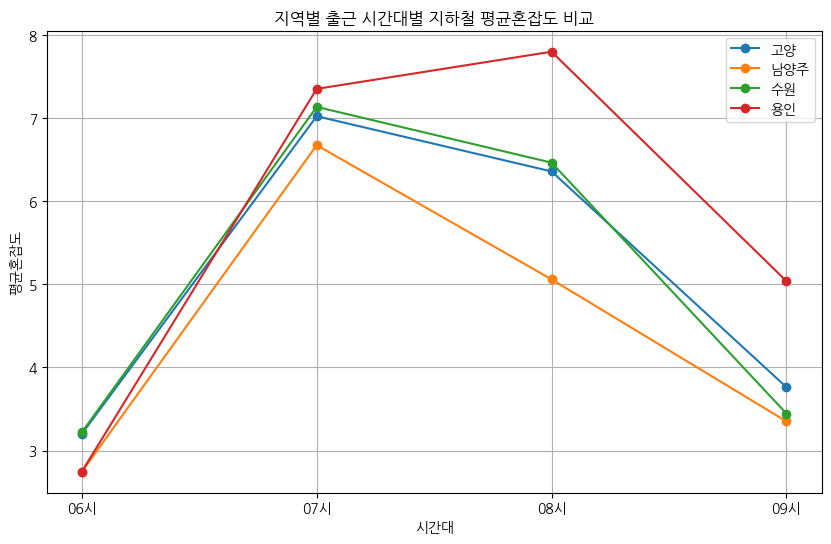

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


시간대 = 고양_시간대별_평균.index  # 시간대 정보
고양_값 = 고양_시간대별_평균.values.astype(float)  # 고양의 데이터
남양주_값 = 남양주_시간대별_평균.values.astype(float)  # 남양주의 데이터
수원_값 = 수원_시간대별_평균.values.astype(float)  # 수원의 데이터
용인_값 = 용인_시간대별_평균.values.astype(float)  # 용인의 데이터

# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(시간대, 고양_값, marker='o', label='고양')
plt.plot(시간대, 남양주_값, marker='o', label='남양주')
plt.plot(시간대, 수원_값, marker='o', label='수원')
plt.plot(시간대, 용인_값, marker='o', label='용인')


plt.title('지역별 출근 시간대별 지하철 평균혼잡도 비교')
plt.xlabel('시간대')
plt.ylabel('평균혼잡도')

# X축 눈금 레이블 설정
plt.xticks(시간대)

# 범례
plt.legend()

# 그리드
plt.grid(True)
plt.show()


In [ ]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

# 지역별 퇴근시간 지하철 혼잡도

In [ ]:


sub_3_evening = result_df_subway_on3[['지하철역','17시', '18시', '19시']]

e3 = (sub_3_evening.iloc[:,1:] / (120 *10 * 1600)) *100

e3['지하철역'] = sub_3_evening['지하철역']
e3 =e3[['지하철역','17시', '18시', '19시']]

e3['means'] = np.mean(e3,axis=1)
e3

/Users/guhee/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,지하철역,17시,18시,19시,means
0,가락시장,4.520469,5.879323,2.540573,4.313455
1,경복궁(정부서울청사),18.230052,23.476094,9.621354,17.109167
2,경찰병원,3.295781,4.246146,1.497969,3.013299
3,고속터미널,29.937448,28.963542,25.042969,27.981319
4,교대(법원.검찰청),10.454271,14.433177,6.627969,10.505139
5,구파발,7.945833,6.400990,4.099635,6.148819
6,금호,2.431146,2.401094,1.580000,2.137413
7,남부터미널(예술의전당),21.362396,27.493594,12.780156,20.545382
8,녹번,3.824635,4.273385,2.109063,3.402361
9,대청,5.161875,5.386771,2.458385,4.335677


In [ ]:
sub_일산_evening = result_df_subway_on_일산[['지하철역','17시', '18시', '19시']]

# 일산 퇴근 혼잡도
e_일산 = (sub_일산_evening.iloc[:,1:] / (120 * 10 * 1600)) *100

e_일산['지하철역'] = sub_일산_evening['지하철역']
e_일산 =e_일산[['지하철역','17시', '18시', '19시']]

e_일산['means'] = np.mean(e_일산,axis=1)
e_일산


/Users/guhee/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,지하철역,17시,18시,19시,means
0,대곡,1.144167,1.160833,0.590417,0.965139
1,대화,4.565208,4.385313,2.184948,3.711823
2,마두,3.566458,3.478698,1.577083,2.874080
3,백석,4.810104,4.976510,2.632031,4.139549
4,삼송,6.526927,6.758073,4.128385,5.804462
5,원당,3.554531,3.247135,1.739844,2.847170
6,원흥,3.428385,3.854844,1.840885,3.041372
7,정발산,4.629583,5.187812,2.777917,4.198437
8,주엽,3.287448,3.132969,1.701250,2.707222
9,지축,0.000313,0.000208,0.000104,0.000208


In [ ]:
sub_4_evening = result_df_subway_on4[['지하철역','17시', '18시', '19시']]

#4호선 퇴근 혼잡도
e4 = (sub_4_evening.iloc[:,1:] / (120 * 6 * 1600)) *100

e4['지하철역'] = sub_4_evening['지하철역']
e4 =e4[['지하철역','17시', '18시', '19시']]

e4['means'] = np.mean(e4,axis=1)
e4


/Users/guhee/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,지하철역,17시,18시,19시,means
0,길음,12.675694,11.664844,6.365104,10.235214
1,남태령,1.876389,1.413455,0.545312,1.278385
2,노원,11.797743,11.836285,8.557378,10.730469
3,당고개,4.672396,4.251302,2.712847,3.878848
4,동대문,29.519097,21.120573,11.541146,20.726939
5,동대문역사문화공원(DDP),21.585590,27.264583,15.108160,21.319444
6,동작(현충원),1.605556,1.648351,0.751389,1.335098
7,명동,32.466146,45.546441,25.523090,34.511892
8,미아(서울사이버대학),9.882726,9.851302,5.886458,8.540162
9,미아사거리,14.706597,14.798872,10.715451,13.406973


In [ ]:
sub_경춘_evening = result_df_subway_on_경춘선[['지하철역','17시', '18시', '19시']]

# 경춘선 퇴근 혼잡도
e_경춘 = (sub_경춘_evening.iloc[:,1:] / (120 *4 * 1600)) *100

e_경춘['지하철역'] = sub_경춘_evening['지하철역']
e_경춘 =e_경춘[['지하철역','17시', '18시', '19시']]

e_경춘['means'] = np.mean(e_경춘,axis=1)
e_경춘


/Users/guhee/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,지하철역,17시,18시,19시,means
0,가평,3.558333,2.792187,1.340234,2.563585
1,갈매,2.378125,2.432682,1.220052,2.010286
2,강촌,0.878646,0.508594,0.261849,0.549696
3,굴봉산,0.166536,0.110286,0.065365,0.114063
4,금곡,1.706771,1.890365,0.675130,1.424089
5,김유정,0.701172,0.485026,0.197266,0.461155
6,남춘천,3.136328,2.517448,1.945182,2.532986
7,대성리,0.875000,0.665625,0.308984,0.616536
8,마석,3.536328,3.597135,1.792969,2.975477
9,백양리,0.397396,0.273568,0.080990,0.250651


In [ ]:
sub_분당_evening = result_df_subway_on_분당선[['지하철역','17시', '18시', '19시']]

# 분당선 퇴근 혼잡도
e_분당 = (sub_분당_evening.iloc[:,1:] / (120 * 10 * 1600)) *100

e_분당['지하철역'] = sub_분당_evening['지하철역']
e_분당 =e_분당[['지하철역','17시', '18시', '19시']]

e_분당['means'] = np.mean(e_분당,axis=1)
e_분당


/Users/guhee/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,지하철역,17시,18시,19시,means
0,가천대,5.886563,3.704896,2.331510,3.974323
1,강남구청,6.231875,10.396250,5.306927,7.311684
2,개포동,2.174062,1.950469,1.212240,1.778924
3,구룡,1.659531,1.064583,0.590156,1.104757
4,구성,1.653854,1.390625,0.712865,1.252448
5,기흥,4.592187,5.090469,2.713802,4.132153
6,대모산입구,2.194427,2.146927,1.059323,1.800226
7,도곡,4.656927,4.863750,2.460313,3.993663
8,망포,7.423854,9.411719,4.658958,7.164844
9,매교,2.031615,1.552396,0.821250,1.468420


In [ ]:
e_경의 = pd.read_excel('/Users/guhee/Desktop/EDA교통/경의선 승차(퇴근).xlsx')

e_경의 = e_경의.rename(columns={'평균' : 'means'})

In [ ]:
e경부 = pd.read_excel('/Users/guhee/Desktop/EDA교통/경부선 승차(퇴근).xlsx')

e_경부 = e경부.rename(columns={'평균' : 'means'})
real_경부2 =e_경부.iloc[:,0:] * (120 * 160)

e_경부 = (real_경부2.iloc[:,1:] /(1600 *120 * 10)) *100
e_경부['지하철역'] = e경부['지하철역']


e_경부 =e_경부[['지하철역','17시', '18시', '19시','means']]
e_경부

,지하철역,17시,18시,19시,means
0,가산디지털단지,14.795677,22.194948,8.845885,15.278837
1,관악,2.521823,2.330729,1.398177,2.083576
2,광명,1.975781,2.164740,1.843021,1.994514
3,구로,10.474323,12.264583,5.294896,9.344601
4,군포,5.043021,7.247135,2.402708,4.897622
5,금정,13.426354,15.868073,7.446667,12.247031
6,금천구청,3.571563,5.411823,2.307448,3.763611
7,남영,6.641250,8.487135,3.619167,6.249184
8,노량진,3.692865,3.828021,2.824844,3.448576
9,당정,2.467500,2.877135,1.168125,2.170920


In [ ]:
e1 = pd.read_excel('/Users/guhee/Desktop/EDA교통/1호선 승차(퇴근).xlsx')

e1 = e1.rename(columns={'평균' : 'means'})

In [ ]:
e중앙 = pd.read_excel('/Users/guhee/Desktop/EDA교통/중앙선 승차(퇴근).xlsx')

e_중앙 = e중앙.rename(columns={'평균' : 'means'})
real_중앙2 =e_중앙.iloc[:,0:] * (120 * 160)
real_중앙2

# 중앙선 퇴근 혼잡도
e_중앙 = (real_중앙2.iloc[:,1:] /(1600 *120 * 6)) *100
e_중앙['지하철역'] = e중앙['지하철역']

e_중앙 = e_중앙[['지하철역','17시', '18시', '19시','means']]

e_중앙

,지하철역,17시,18시,19시,means
0,가좌,3.151997,3.144184,1.954167,2.750116
1,강매,1.134549,1.319184,0.471528,0.975087
2,검암,0.000000,0.000000,0.000174,0.000058
3,계양,0.000174,0.000260,0.000000,0.000145
4,곡산,0.640451,0.713281,0.217101,0.523611
5,공덕,3.936806,6.024132,2.720833,4.227257
6,금릉,3.698698,3.897049,1.969965,3.188571
7,금촌,4.889757,5.911806,2.799566,4.533709
8,김포공항,0.000087,0.000087,0.000000,0.000058
9,능곡,2.335417,2.124392,1.175521,1.878443


In [ ]:
e_신분당 = pd.read_excel('/Users/guhee/Desktop/EDA교통/신분당선_퇴근.xlsx')

e_신분당 = e_신분당.drop('Unnamed: 0' , axis=1)
e_신분당 =e_신분당.rename(columns={'정류장':'지하철역'})

e_신분당= e_신분당.rename(columns={17:'17시' ,18:'18시',19:'19시' })
e_신분당

,지하철역,17시,18시,19시,means
0,광교중앙(아주대) [신분당선],4.429323,4.329792,2.279010,3.679375
1,동천 [신분당선],3.230833,3.767240,1.683646,2.893906
2,미금 [신분당선],5.418125,5.323229,2.715990,4.485781
3,상현 [신분당선],3.438177,3.385417,1.661875,2.828490
4,성복 [신분당선],4.660938,4.127917,2.402448,3.730434
5,수지구청 [신분당선],4.347656,3.512500,2.254792,3.371649
6,광교(경기대) [신분당선],1.456094,1.342865,0.639792,1.146250


In [ ]:
goyang_list =['대화','주엽', '정발산', '마두', '대곡', '화정', '원당', '원흥', '삼송', '지축', '탄현', '일산', '풍산', '백마', '곡산', '대곡', '능곡', '행신', '강매', '화전']
namyang_list =['도농', '양정', '덕소', '도심', '팔당', '운길산', '별내', '퇴계원', '사릉', '금곡', '평내호평', '천마산', '마석']
yongin_list = ['죽전', '보정', '구성', '신갈', '기흥', '산갈', '동천 [신분당선]', '수지구청 [신분당선]', '성복 [신분당선]', '상현 [신분당선]', '기흥']
suwon_list= ['성균관대', '화서', '수원', '세류', '청명', '영통', '망포', '매탄권선', '수원시청', '매교', '수원', '광교중앙 [신분당선]', '광교(경기대) [신분당선]', '고색', '오목천']



In [ ]:
# 고양 퇴근
goyang_off = pd.concat([e3, e_일산,e_경의])
goyang_off = goyang_off.reset_index(drop=True)

In [ ]:
# 남양주  퇴근
namyang_off = pd.concat([e4,e_중앙,e_경춘])
namyang_off = namyang_off.reset_index(drop=True)

In [ ]:
# 용인 퇴근
yongin_off = pd.concat([e_분당,e_경춘,e_신분당])
yongin_off = yongin_off.reset_index(drop=True)

In [ ]:
# 수원 퇴근
suwon_off = pd.concat([e1,e_경부,e_분당,e_신분당])
suwon_off = suwon_off.reset_index(drop=True)

In [ ]:
goyang_df = goyang_off[goyang_off['지하철역'].isin(goyang_list)]
goyang_df.loc['평균'] = goyang_df.iloc[:, 1:].sum(axis=0) / (len(goyang_df['지하철역'])-1)
#goyang_df = goyang_df[goyang_df['06시'] != 0]
#goyang_df.reset_index(drop=True)
goyang_df

/var/folders/7v/1qbrz23j7vv63lcq_txv44540000gn/T/ipykernel_66900/2620947494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goyang_df.loc['평균'] = goyang_df.iloc[:, 1:].sum(axis=0) / (len(goyang_df['지하철역'])-1)


,지하철역,17시,18시,19시,means
30,지축,2.200052,1.769948,1.164062,1.711354
34,대곡,1.144167,1.160833,0.590417,0.965139
35,대화,4.565208,4.385313,2.184948,3.711823
36,마두,3.566458,3.478698,1.577083,2.874080
38,삼송,6.526927,6.758073,4.128385,5.804462
39,원당,3.554531,3.247135,1.739844,2.847170
40,원흥,3.428385,3.854844,1.840885,3.041372
41,정발산,4.629583,5.187812,2.777917,4.198437
42,주엽,3.287448,3.132969,1.701250,2.707222
43,지축,0.000313,0.000208,0.000104,0.000208


In [ ]:
namyang_df = namyang_off[namyang_off['지하철역'].isin(namyang_list)]

namyang_df.loc['평균'] = namyang_df.iloc[:, 1:].sum(axis=0) / len(namyang_df['지하철역'])
#namyang_df.reset_index(drop=True)
namyang_df

/var/folders/7v/1qbrz23j7vv63lcq_txv44540000gn/T/ipykernel_66900/1790722329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  namyang_df.loc['평균'] = namyang_df.iloc[:, 1:].sum(axis=0) / len(namyang_df['지하철역'])


,지하철역,17시,18시,19시,means
60,금곡,1.706771,1.890365,0.675130,1.424089
64,마석,3.536328,3.597135,1.792969,2.975477
66,별내,3.486719,3.526823,1.800911,2.938151
67,사릉,2.230990,2.704688,1.013281,1.982986
70,천마산,0.981641,1.148438,0.471224,0.867101
73,퇴계원,2.560156,3.130990,1.426172,2.372439
74,평내호평,4.534635,4.537240,2.681901,3.917925
평균,NaN,2.719606,2.933668,1.408798,2.354024


In [ ]:
yongin_df = yongin_off[yongin_off['지하철역'].isin(yongin_list)]

yongin_df.loc['평균'] = yongin_df.iloc[:, 1:].sum(axis=0) / len(yongin_df['지하철역'])
yongin_df.reset_index(drop=True)

/var/folders/7v/1qbrz23j7vv63lcq_txv44540000gn/T/ipykernel_66900/526243277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yongin_df.loc['평균'] = yongin_df.iloc[:, 1:].sum(axis=0) / len(yongin_df['지하철역'])


,지하철역,17시,18시,19시,means
0,구성,1.653854,1.390625,0.712865,1.252448
1,기흥,4.592187,5.090469,2.713802,4.132153
2,보정,1.059635,0.867396,0.377240,0.768090
3,신갈,1.298802,1.152188,0.546719,0.999236
4,죽전,6.315781,6.797604,4.343802,5.819063
5,동천 [신분당선],3.230833,3.767240,1.683646,2.893906
6,상현 [신분당선],3.438177,3.385417,1.661875,2.828490
7,성복 [신분당선],4.660938,4.127917,2.402448,3.730434
8,수지구청 [신분당선],4.347656,3.512500,2.254792,3.371649
9,NaN,3.399763,3.343484,1.855243,2.866163


In [ ]:
suwon_df = suwon_off[suwon_off['지하철역'].isin(suwon_list)]
suwon_df = suwon_df.drop(index=34)

suwon_df.loc['평균'] = suwon_df.iloc[:, 1:].sum(axis=0) / len(suwon_df['지하철역'])
#suwon_df.reset_index(drop=True)



suwon_df

,지하철역,17시,18시,19시,means
29,성균관대,5.450885,5.092083,3.116562,4.553177
31,세류,1.428333,1.132031,0.696094,1.085486
48,화서,2.688802,2.225729,1.310781,2.075104
57,망포,7.423854,9.411719,4.658958,7.164844
58,매교,2.031615,1.552396,0.821250,1.468420
59,매탄권선,2.059792,1.951406,1.067865,1.693021
71,수원,3.664479,4.155312,3.025000,3.614931
72,수원시청,6.462812,8.718125,4.598802,6.593247
76,영통,4.785469,5.374948,2.995104,4.385174
81,청명,1.656979,2.004792,0.897969,1.519913


# 시간대별 지하철 평균 혼잡도

In [ ]:
고양_시간대별_평균 = goyang_df.iloc[-1, 1:-1]
pd.DataFrame(고양_시간대별_평균)

,평균
17시,2.958289
18시,2.865803
19시,1.535225


In [ ]:
남양주_시간대별_평균 = namyang_df.iloc[-1, 1:-1]
pd.DataFrame(남양주_시간대별_평균)

,평균
17시,2.719606
18시,2.933668
19시,1.408798


In [ ]:
용인_시간대별_평균 = yongin_df.iloc[-1, 1:-1]
pd.DataFrame(용인_시간대별_평균)

,평균
17시,3.399763
18시,3.343484
19시,1.855243


In [ ]:
수원_시간대별_평균 = suwon_df.iloc[-1, 1:-1]
pd.DataFrame(수원_시간대별_평균)

,평균
17시,3.555374
18시,3.905582
19시,2.166198


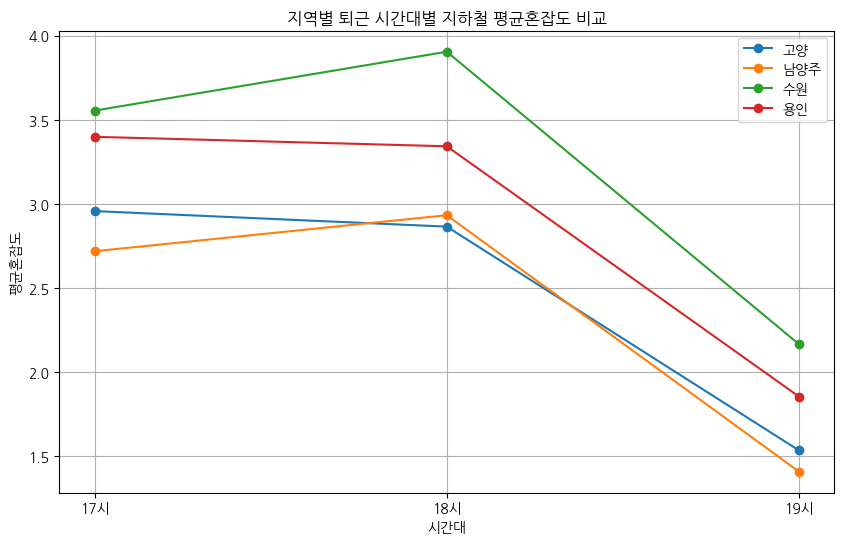

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


시간대 = 고양_시간대별_평균.index  # 시간대 정보
고양_값 = 고양_시간대별_평균.values.astype(float)  # 고양의 데이터
남양주_값 = 남양주_시간대별_평균.values.astype(float)  # 남양주의 데이터
수원_값 = 수원_시간대별_평균.values.astype(float)  # 수원의 데이터
용인_값 = 용인_시간대별_평균.values.astype(float)  # 용인의 데이터

# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(시간대, 고양_값, marker='o', label='고양')
plt.plot(시간대, 남양주_값, marker='o', label='남양주')
plt.plot(시간대, 수원_값, marker='o', label='수원')
plt.plot(시간대, 용인_값, marker='o', label='용인')


plt.title('지역별 퇴근 시간대별 지하철 평균혼잡도 비교')
plt.xlabel('시간대')
plt.ylabel('평균혼잡도')

# X축 눈금 레이블 설정
plt.xticks(시간대)

# 범례
plt.legend()

# 그리드
plt.grid(True)
plt.show()
